In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize

# Definindo um problema multiobjetivo
problem = get_problem("zdt1")

# Escolhendo o algoritmo NSGA-II
algorithm = NSGA2(pop_size=100)

# Executando a otimização SEM um critério de parada explícito
res = minimize(problem, algorithm, seed=1)

# Número de gerações utilizadas até a parada
print(res.algorithm.n_gen)

475


In [2]:
from pymoo.termination.default import DefaultMultiObjectiveTermination

termination = DefaultMultiObjectiveTermination(
    xtol=1e-8,       # Tolerância no espaço de decisão
    cvtol=1e-6,      # Tolerância em restrições
    ftol=0.0025,     # Tolerância no espaço dos objetivos
    period=30,       # Janela de verificação
    n_max_gen=1000,  # Limite máximo de gerações
    n_max_evals=100000  # Limite máximo de avaliações de função
)

In [3]:
from pymoo.termination.default import DefaultSingleObjectiveTermination

termination = DefaultSingleObjectiveTermination(
    xtol=1e-8,
    cvtol=1e-6,
    ftol=1e-6,
    period=20,
    n_max_gen=1000,
    n_max_evals=100000
)

In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.termination import get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("n_eval", 300)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00
     2 |      200 |     18 |  1.3046483561 |  1.5588523095 |  0.000000E+00
     3 |      300 |     16 |  1.2932937752 |  1.5844238263 |  0.000000E+00


In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.termination import get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("n_gen", 10)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00
     2 |      200 |     18 |  1.3046483561 |  1.5588523095 |  0.000000E+00
     3 |      300 |     16 |  1.2932937752 |  1.5844238263 |  0.000000E+00
     4 |      400 |     15 |  1.1445622659 |  1.4842997913 |  0.000000E+00
     5 |      500 |     14 |  1.0123206326 |  1.3481538890 |  0.000000E+00
     6 |      600 |     14 |  0.8349098789 |  1.2741006339 |  0.000000E+00
     7 |      700 |     20 |  0.6923726099 |  1.1695633437 |  0.000000E+00
     8 |      800 |     16 |  0.6923726099 |  1.0116742630 |  0.000000E+00
     9 |      900 |     22 |  0.6397831073 |  0.9591150923 |  0.000000E+00
    10 |     1000 |     29 |  0.6190753867 |  0.9737361068 |  8.415737E-07


In [6]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.termination import get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("time", "00:00:03")

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print("Número de gerações executadas:", res.algorithm.n_gen)

Número de gerações executadas: 477


In [7]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.termination.xtol import DesignSpaceTermination
from pymoo.termination.robust import RobustTermination

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = RobustTermination(DesignSpaceTermination(tol=0.01), period=20)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print("Número de gerações executadas:", res.algorithm.n_gen)

Número de gerações executadas: 176


Número de gerações executadas: 150


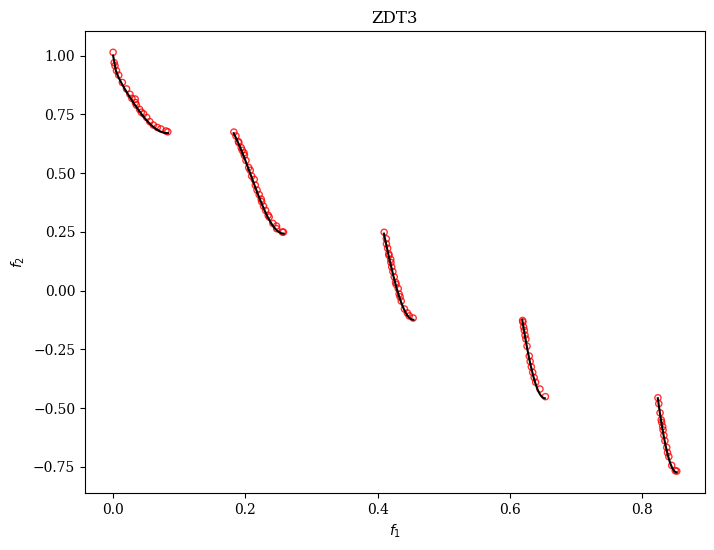

In [8]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.termination.ftol import MultiObjectiveSpaceTermination
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt3")

algorithm = NSGA2(pop_size=100)

termination = RobustTermination(
    MultiObjectiveSpaceTermination(tol=0.005, n_skip=5), period=20)


res = minimize(problem,
               algorithm,
               termination,
               pf=True,
               seed=1,
               verbose=False)

print("Número de gerações executadas:", res.algorithm.n_gen)
plot = Scatter(title="ZDT3")
plot.add(problem.pareto_front(use_cache=False, flatten=False), plot_type="line", color="black")
plot.add(res.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()